In [1]:
import numpy as np
import math
from scipy.special import gamma, gammainc
import matplotlib.pyplot as plt

In [2]:
nu = np.array([1, 2, 3], dtype='float')
z = np.array([3, 4, 5])

In [3]:
nu = np.array([
    3, 4, 5, 8, 12, 13, 24, 13, 17, 25, 25, 42
])
z = np.array([
    15.6, 79.4, 44.6, 51.5, 19.4, 38.6, 133.3, 38.6, 40.5, 20.4, 21.8, 87.2
])

In [4]:
nu.size, z.size

(12, 12)

In [5]:
def get_gamma_distribution(alpha, estimated_E):
    def gamma_distribution(x):
        return gammainc(alpha, alpha*x*estimated_E)
#         return np.exp(-x*alpha/estimated_E) * x**(alpha-1) * (alpha/estimated_E)**alpha / gamma(alpha)
    return gamma_distribution

In [6]:
def estimate_E(nu, z):
    return (nu * z).sum() / nu.sum()

In [7]:
def psi_approximation(x):
    return np.log(x) - x**(-1)/2 - x**(-2)/12 + (x**(-4) - 0.46*x**(-6))/120

In [8]:
def count_zero_alpha(estimated_E, nu, z):
    return estimated_E**2 * (nu.size - 1) / (nu * (z - estimated_E)**2).sum()

In [9]:
def count_next_alpha(prev_alpha, estimated_E, nu, z):
    def frac(integer):
        return 1 / (prev_alpha * nu + integer)
    def complex_log():
        return np.log(
            prev_alpha * nu * z / estimated_E
        )
    J = nu.size
    next_alpha = J / np.sum(
        nu * (psi_approximation(prev_alpha * nu + 5) - frac(4) - frac(3) - frac(2) - frac(1)) - complex_log()
    )
    return next_alpha

In [10]:
estimated_E = estimate_E(nu, z)
zero_alpha = count_zero_alpha(estimated_E, nu, z)
estimated_E, zero_alpha

(56.75863874345549, 0.12609417884329027)

In [11]:
alpha = zero_alpha
for i in range(200):
    alpha = count_next_alpha(alpha, estimated_E, nu, z)
alpha

0.07838528207824014

In [12]:
gamma_distribution = get_gamma_distribution(alpha, estimated_E)

In [13]:
x_ = np.arange(0, 1, 0.0001)

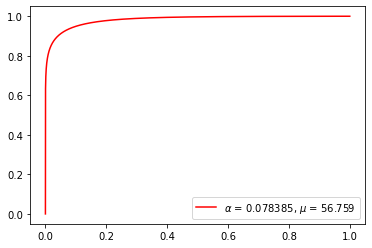

In [14]:
plt.plot(x_, gamma_distribution(x_), label=fr"$\alpha$ = {alpha:.5}, $\mu$ = {estimated_E:.5}", color='red')
plt.legend()
plt.show()